# Homework 2
#### EE-556 Mathematics of Data - Fall 2024

This homework covers Lectures 8-12. Please take a look at the material for the context and notation.

In this homework we will study minimax problems. We will begin with some theoretical analysis and in a second part you will implement a Wasserstein Generative Adversarial Network (WGAN). 

These notebooks should expose you to the fundamentals of GAN training at a basic level, as well as some of the theory behind it.

## 1. Minimax problems - 65 points

### 1.1 Theoretical recap: stationary points and convergence in minmax games - 25 points

Consider a stylized function $f:\mathbb{R}^4 \to \mathbb{R}$ with variables $x_1,x_2,y_1,y_2$, we denote by
$x=(x_1,x_2) \in \mathbb{R}^2$, $y=(y_1,y_2) \in \mathbb{R}^2$, the function has the form of
$
f(x,y) = (a x - b)^\top (a y - c), \quad a \neq 0, \; b,c \in \mathbb{R}^2.
$


__(1)__ (5 points) Write down the first-order stationary points of $f$, and
        classify them as local minimum, local maximum, or saddle point by
        inspecting its Hessian.




Let $f(x,y) = (a x - b)^\top (a y - c)$, where $x, y, b, c \in \mathbb{R}^2$ and $a \in \mathbb{R}, a \neq 0$.

We can rewrite $f(x,y)$ as  $f(x,y) = a x^\top (ay - c) - b^\top (ay - c) $

To find the stationary points, we compute the gradient of $f$ with respect to both $x$ and $y$ and set them to zero.

$$
\nabla_x f(x,y) = \nabla_x \left( a x^\top (ay - c) - b^\top (ay - c) \right) = a(ay - c)
$$

$$
\nabla_y f(x,y) = \nabla_y \left( (ax - b)^\top (ay) - (ax - b)^\top c \right) = a(ax - b)
$$

By setting the gradients to zero, we have:
$$
\begin{cases}
a(ay - c) = 0 \\
a(ax - b) = 0
\end{cases}
$$

Since $a \neq 0$, we can divide by $a$:
$$
\begin{cases}
ay - c = 0 \implies y^* = \frac{c}{a} \\
ax - b = 0 \implies x^* = \frac{b}{a}
\end{cases}
$$

So there is a unique stationary point at:
$$
(x^*, y^*) = \left( \frac{b}{a}, \frac{c}{a} \right)
$$



The Hessian matrix $H$ of $f$ involves the second-order partial derivatives. Since $x, y \in \mathbb{R}^2$, which means 4 input variables, the full Hessian is a $4 \times 4$ matrix composed of four $2 \times 2$ blocks:

$$
H = \nabla^2 f(x,y) = \begin{pmatrix}
\nabla_{xx}^2 f & \nabla_{xy}^2 f \\
\nabla_{yx}^2 f & \nabla_{yy}^2 f
\end{pmatrix}
$$

**Calculating the blocks:**

1.  **$\nabla_{xx}^2 f$:**
    $$\frac{\partial}{\partial x} (a(ay - c)) = 0$$
    (The expression depends only on $y$). Thus, $\nabla_{xx}^2 f = \mathbf{0}_{2 \times 2}$.

2.  **$\nabla_{yy}^2 f$:**
    $$\frac{\partial}{\partial y} (a(ax - b)) = 0$$
    (The expression depends only on $x$). Thus, $\nabla_{yy}^2 f = \mathbf{0}_{2 \times 2}$.

3.  **$\nabla_{xy}^2 f$:**
    $$\frac{\partial}{\partial y} (a(ay - c)) = \frac{\partial}{\partial y} (a^2 y - ac) = a^2 I_2$$
    Where $I_2$ is the $2 \times 2$ identity matrix.

4.  **$\nabla_{yx}^2 f$:**
    By Symmetry (or derivation), this is also $a^2 I_2$.

**The Hessian Matrix:**
$$
H = \begin{pmatrix}
0 & 0 & a^2 & 0 \\
0 & 0 & 0 & a^2 \\
a^2 & 0 & 0 & 0 \\
0 & a^2 & 0 & 0
\end{pmatrix} = \begin{pmatrix} \mathbf{0} & a^2 I_2 \\ a^2 I_2 & \mathbf{0} \end{pmatrix}
$$

**Eigenvalue Analysis:**
To classify the point, we analyze the eigenvalues $\lambda$ of $H$. The characteristic equation is $\det(H - \lambda I) = 0$.
Given the block structure $\begin{pmatrix} -\lambda I & a^2 I \\ a^2 I & -\lambda I \end{pmatrix}$, the determinant is:
$$
\det((-\lambda I)^2 - (a^2 I)^2) = \det(\lambda^2 I - a^4 I) = (\lambda^2 - a^4)^2
$$
Setting this to 0:
$$
\lambda^2 = a^4 \implies \lambda = \pm a^2
$$

Since $a \neq 0$, we have:
* Two positive eigenvalues $\lambda = a^2$
* Two negative eigenvalues $\lambda = -a^2$

**Conclusion:**
Because the Hessian matrix has both strictly positive and strictly negative eigenvalues, it is **indefinite**. Therefore, the stationary point $(x^*, y^*)$ is a **Saddle Point**.

__(2)__ (5 points) Find the solution $(x^\star,y^\star)$ to the
        minimax problem $\min_x \max_y f(x, y)$. You can quantify the solution
        by using the following saddle point inequality:  $f(x^\star, y^\star)
        \geq f(x^\star, y)$ and $f(x^\star, y^\star) \leq f(x, y^\star)$, for
        all $x, y$.
        
**HINT:** $(x^\star, y^\star)$ can only be one of the critical points you found in (1), just evaluate $f$ at every place in the inequalities to check the optimality!




From part (1), we identified the unique stationary point as:
$$
(x^\star, y^\star) = \left(\frac{b}{a}, \frac{c}{a}\right)
$$

To confirm this is the solution to the minimax problem, we verify the saddle point inequalities:
$$
f(x^\star, y) \leq f(x^\star, y^\star) \leq f(x, y^\star) \quad \forall x, y
$$

**(i) Evaluate the value at the stationary point $f(x^\star, y^\star)$:**

Substituting $x^\star = b/a$ and $y^\star = c/a$ into $f(x,y) = (ax - b)^\top (ay - c)$:
$$
f(x^\star, y^\star) = \left( a\left(\frac{b}{a}\right) - b \right)^\top \left( a\left(\frac{c}{a}\right) - c \right)
$$
$$
f(x^\star, y^\star) = (b - b)^\top (c - c) = 0^\top 0 = 0
$$

**(ii) Verify the first inequality: $f(x^\star, y^\star) \geq f(x^\star, y)$**

We evaluate $f(x^\star, y)$ for any arbitrary $y$:
$$
f(x^\star, y) = \left( a\left(\frac{b}{a}\right) - b \right)^\top (ay - c) = (b - b)^\top (ay - c) = 0^\top (ay - c) = 0
$$
Since $0 \geq 0$ holds (as an equality), the condition is satisfied.

**(iii) Verify the second inequality: $f(x^\star, y^\star) \leq f(x, y^\star)$**

We evaluate $f(x, y^\star)$ for any arbitrary $x$:
$$
f(x, y^\star) = (ax - b)^\top \left( a\left(\frac{c}{a}\right) - c \right) = (ax - b)^\top (c - c) = (ax - b)^\top 0 = 0
$$
Since $0 \leq 0$ holds (as an equality), the condition is satisfied.

**Conclusion:**

The point $(x^\star, y^\star) = (b/a, c/a)$ satisfies the saddle point inequalities:
$$
0 \leq 0 \leq 0
$$
Therefore, the only stationary point we found: **$(x^\star, y^\star) = (b/a, c/a)$ is the solution to the minimax problem.**

What is interesting here is that when any of the two player reached their optimal value $x^\star$ or $ y^\star$, the result is always 0, because they "neutralize" their opponent. This is an example of a bilinear game. 

__(3)__ (15 points) One possible attempt at finding this solution via iterative
        first-order methods is to perform gradient updates on the variables $x$
        and $y$. More precisely for $\gamma > 0$ consider the simultaneous gradient
        descent/ascent updates
        
\begin{equation}
    x^{k+1} = x^k - \gamma \nabla_x f(x^k, y^k), \qquad
    y^{k+1} = y^k + \gamma \nabla_y f(x^k, y^k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x^k, y^k \}_{k=0}^\infty$ starting
from any point $(x^0, y^0) \neq (x^\star, y^\star)$ diverges, for any $\gamma > 0$.
Find the rate at which the distance from 
$(x^\star,y^\star)$ to the sequence $\{x^k, y^k \}$ grows as the number of iterations $k$ increases.

**HINT:** Define $d_k^2=||(x^k,y^k)-(x^\star, y^\star)||_2^2$ as the sequence of squared distances to the optimum. If you find a formula for how $d_{k+1}$ depends on $d_k$ using the exact gradient updates for our $f$, you can easily argue for the divergence and the rate.

We analyze what happens if we apply simultaneous updates:
$$
x^{k+1} = x^k - \gamma \nabla_x f(x^k, y^k)
$$
$$
y^{k+1} = y^k + \gamma \nabla_y f(x^k, y^k)
$$

**1. Express gradients in terms of deviation from optima**
From part (1), we know the gradients are:
$$\nabla_x f(x,y) = a(ay - c) \quad \text{and} \quad \nabla_y f(x,y) = a(ax - b)$$

We also know the stationary points are $x^\star = b/a$ and $y^\star = c/a$.
We can rewrite the terms $(ay - c)$ and $(ax - b)$ using these stationary points:
$$ay - c = a(y - \frac{c}{a}) = a(y - y^\star)$$
$$ax - b = a(x - \frac{b}{a}) = a(x - x^\star)$$

Substituting these back into the update rules:
$$x^{k+1} = x^k - \gamma a^2 (y^k - y^\star)$$
$$y^{k+1} = y^k + \gamma a^2 (x^k - x^\star)$$

**2. Shift to error coordinates**
Let $u^k = x^k - x^\star$ and $v^k = y^k - y^\star$ be the displacement vectors from the optimum.
Subtracting $x^\star$ and $y^\star$ from the update equations, we get the recurrence for the errors:
$$u^{k+1} = u^k - \gamma a^2 v^k$$
$$v^{k+1} = v^k + \gamma a^2 u^k$$

**3. Analyze the squared distance $d_{k+1}^2$**
The squared distance to the optimum is $d_k^2 = \|u^k\|_2^2 + \|v^k\|_2^2$.
Let's calculate $d_{k+1}^2$:

$$
d_{k+1}^2 = \|u^{k+1}\|_2^2 + \|v^{k+1}\|_2^2
$$

Substitute the error recurrence relations:
$$
d_{k+1}^2 = \|u^k - \gamma a^2 v^k\|_2^2 + \|v^k + \gamma a^2 u^k\|_2^2
$$

Expand the squared norms (using $\|a+b\|^2 = \|a\|^2 + \|b\|^2 + 2a^\top b$):
$$
\|u^{k+1}\|_2^2 = \|u^k\|_2^2 + \gamma^2 a^4 \|v^k\|_2^2 - 2\gamma a^2 (u^k)^\top v^k
$$
$$
\|v^{k+1}\|_2^2 = \|v^k\|_2^2 + \gamma^2 a^4 \|u^k\|_2^2 + 2\gamma a^2 (v^k)^\top u^k
$$

Now sum them up. Notice that the cross terms $- 2\gamma a^2 (u^k)^\top v^k$ and $+ 2\gamma a^2 (v^k)^\top u^k$ cancel out perfectly (since the dot product is commutative):

$$
d_{k+1}^2 = \left( \|u^k\|_2^2 + \|v^k\|_2^2 \right) + \gamma^2 a^4 \left( \|v^k\|_2^2 + \|u^k\|_2^2 \right)
$$

Factor out $(\|u^k\|_2^2 + \|v^k\|_2^2)$, which is simply $d_k^2$:
$$
d_{k+1}^2 = (1 + \gamma^2 a^4) d_k^2
$$

**4. Convergence Analysis and Rate**
We have derived a geometric recurrence relation for the squared distance:
$$d_{k}^2 = (1 + \gamma^2 a^4)^k d_0^2$$

Since we assume $\gamma > 0$ and $a \neq 0$, the term $\gamma^2 a^4$ is strictly positive.
Therefore, the growth factor $1 + \gamma^2 a^4 > 1$.

**Conclusion:**
For any starting point $(x^0, y^0) \neq (x^\star, y^\star)$ (meaning $d_0 > 0$), the distance to the optimum **diverges** to infinity as $k \to \infty$.

**The Divergence Rate:**
The squared distance grows geometrically with a rate of $(1 + \gamma^2 a^4)$.
Consequently, the Euclidean distance $d_k$ grows at a rate of $\sqrt{1 + \gamma^2 a^4}$ per iteration.
If we want to keep the same terminology as seen in class for convergence rates, but in this case for divergence, this corresponds to a **linear** divergence rate, of factor $\sqrt{1 + \gamma^2 a^4}$

__(Optional $\star$)__ A second attempt at finding the solution via _alternating_ gradient descent ascent on $x$
        and $y$. More precisely for $\gamma > 0$ consider the update
        
\begin{equation}
    x^{k+1} = x^k - \gamma \nabla_x f(x^k, y^k), \qquad
    y^{k+1} = y^k + \gamma \nabla_y f(x^{k+1}, y^k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x^k, y^k \}_{k=0}^\infty$ starting
from any point $(x^0, y^0) \neq (x^\star, y^\star)$ i) never converges, ii) but still remains bounded under certain stepsize conditions.


Note: in this example, for simplicity just consider $f:\mathbb{R}^2 \to \mathbb{R}$ with variables $x,y$, where
$x, y \in \mathbb{R}$, the function has the form of
$
f(x,y) = (a x - b) (a y - c), \quad a \neq 0, \; b,c \in \mathbb{R}.
$


**HINT**: Reduce the problem to studying a linear system.


We consider the alternating updates:
$$
x^{k+1} = x^k - \gamma \nabla_x f(x^k, y^k)
$$
$$
y^{k+1} = y^k + \gamma \nabla_y f(x^{k+1}, y^k)
$$

Formulate the update in error coordinates**
Let the stationary point be $x^\star = b/a$ and $y^\star = c/a$.
Define the error terms $u^k = x^k - x^\star$ and $v^k = y^k - y^\star$.

The gradients are:
$\nabla_x f(x,y) = a^2(y - y^\star)$
$\nabla_y f(x,y) = a^2(x - x^\star)$

Substituting these into the update rules:
1.  $u^{k+1} = u^k - \gamma a^2 v^k$
2.  $v^{k+1} = v^k + \gamma a^2 u^{k+1}$

**Note:** In the second equation, we use $u^{k+1}$, which is the "alternating" aspect.

**Reduce to a Linear System**
To write this in matrix form $\begin{pmatrix} u^{k+1} \\ v^{k+1} \end{pmatrix} = M \begin{pmatrix} u^k \\ v^k \end{pmatrix}$, we must eliminate $u^{k+1}$ from the RHS of the second equation.

Let $\alpha = \gamma a^2$.
Substitute equation (1) into equation (2):
$$
v^{k+1} = v^k + \alpha (u^k - \alpha v^k) = v^k + \alpha u^k - \alpha^2 v^k = \alpha u^k + (1 - \alpha^2)v^k
$$

Now we can write the explicit matrix iteration:
$$
\begin{pmatrix} u^{k+1} \\ v^{k+1} \end{pmatrix} = \underbrace{\begin{pmatrix} 1 & -\alpha \\ \alpha & 1-\alpha^2 \end{pmatrix}}_{M} \begin{pmatrix} u^k \\ v^k \end{pmatrix}
$$

**Analyze the Eigenvalues of $M$**
To determine convergence or boundedness, we analyze the eigenvalues $\lambda$ of $M$.
The characteristic polynomial is:
$$
\det(M - \lambda I) = (1-\lambda)(1-\alpha^2 - \lambda) - (-\alpha)(\alpha) = 0
$$
$$
(1-\lambda)(1-\alpha^2-\lambda) + \alpha^2 = 0
$$
$$
1 - \alpha^2 - \lambda - \lambda + \alpha^2 \lambda + \lambda^2 + \alpha^2 = 0
$$
$$
\lambda^2 - (2 - \alpha^2)\lambda + 1 = 0
$$

Notice that the constant term is the determinant of $M$, which is **exactly 1**.
$$\det(M) = \lambda_1 \cdot \lambda_2 = 1$$

**Proof of (i) Non-Convergence**
For the sequence to converge to $(0,0)$, the spectral radius must be strictly less than 1 ($|\lambda| < 1$).
However, since the product of eigenvalues is $\lambda_1 \lambda_2 = 1$:
* If eigenvalues are real, one must be $\geq 1$ (or both are 1 or -1).
* If eigenvalues are complex, they are conjugates $\lambda, \bar{\lambda}$, so $|\lambda|^2 = 1 \implies |\lambda| = 1$.

In all cases, $|\lambda| \not< 1$. Therefore, the error does not shrink to zero. The algorithm **never converges** to the stationary point for any $\gamma > 0$.

**Proof of (ii) Boundedness**
The sequence remains bounded if the eigenvalues are complex with magnitude 1 (resulting in a pure rotation/elliptical orbit). If the eigenvalues are real and distinct (and product is 1), one is $>1$, leading to divergence.

We need the eigenvalues to be complex. This requires the discriminant of the characteristic equation to be negative:
$$
\Delta = (2-\alpha^2)^2 - 4 < 0
$$
$$
(2-\alpha^2)^2 < 4
$$
$$
-2 < 2-\alpha^2 < 2
$$
Subtracting 2:
$$
-4 < -\alpha^2 < 0
$$
Multiplying by -1 (flipping signs):
$$
0 < \alpha^2 < 4
$$

Recalling $\alpha = \gamma a^2$, the condition for boundedness is:
$$
0 < \gamma a^2 < 4 \implies 0 < \gamma < \frac{4}{a^2}
$$
*(Note: Usually strict stability requires the tighter bound $\gamma < 2/a^2$ to avoid oscillating divergence, but mathematically for complex roots we just need $\Delta < 0$)*.

**Conclusion:**
Under the stepsize condition $0 < \gamma < 4/a^2$, the eigenvalues lie **on the unit circle** ($|\lambda|=1$, complex). The system acts as a discrete rotation. The distance to the optimum oscillates but **remains bounded** (does not go to infinity).

### 1.2 A concrete example: Rock - Paper - Scissors - Lizard - Spock - 40 points

To make your previous abstract analysis more concrete, we will now look at the iconic Rock-Paper-Scissors-Lizard-Spock game. Sheldon and Leonard always like to settle their differences through a round of this game, whose rules they state as follows:

*"Scissors cuts Paper, Paper covers Rock, Rock crushes Lizard, Lizard poisons Spock, Spock smashes Scissors, Scissors decapitates Lizard, Lizard eats Paper, Paper disproves Spock, Spock vaporizes Rock, (and as it always has) Rock crushes Scissors"*

Sheldon and Leonard always pick to play Spock because "logic trumps all", it will be your task to show that this is not the optimal strategy.

We can formalize the game as follows. There are two players, the `x` player (e.g. Sheldon) and the `y` player (e.g. Leonard). There is only one single round. The players play a randomized strategy: each player chooses a probability of playing rock/paper/scissors/lizard/Spock. We look at the expected pay-off of these randomized strategies. 

In other words, the players choose an element in $\Delta_5$ the probability simplex in dimension 5. The `x` player chooses a vector $\mathbf{x} = \begin{bmatrix} \mathbf{x}_1 & \mathbf{x}_2 & \mathbf{x}_3 & \mathbf{x}_4 & \mathbf{x}_5 \end{bmatrix} \in \Delta_5$ where $\mathbf{x}_1$ is the probability of playing `Rock`, $\mathbf{x}_2$ is the probability of playing `Paper`, $\mathbf{x}_3$ is the probability of playing `Scissors`, $\mathbf{x}_4$ is the probability of playing `Lizard`, $\mathbf{x}_5$ is the probability of playing `Spock`. The `y` player chooses a vector $\mathbf{y} \in \Delta_5$ defined in the same way. 

The game designers decide that winning the game gives 1 point and a tie gives 0 points. So the expected payoff for a give choice of strategies $\mathbf{x}, \mathbf{y}$ is obtained by computing:
$$
\mathbf{x}^\top \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}\mathbf{y}
$$

The `x` player wants to minimize this expected payoff and the `y` player wants to maximize it. So the problem we seek to solve is

$$
\min_{\mathbf{x} \in \Delta_5} \max_{\mathbf{y} \in \Delta_5} \mathbf{x}^\top \mathbf{M}\mathbf{y} =: f(\mathbf{x}, \mathbf{y})
$$
with $\mathbf{M} = \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}$.

In the following cells, you will implement methods to solve this game and find the optimal strategies.

In [1]:
import torch
from ipywidgets import interact, SelectionSlider, fixed
from itertools import combinations
from scipy.stats import entropy
from lib.utils import *

**(1)** (2 points) Implement the objective function $f$ given two 3 dimensional vectors `x` and `y` stored as `torch.Tensor` objects.

In [2]:
M = torch.tensor([
    [ 0.,  1., -1., -1.,  1.],   # Rock
    [-1.,  0.,  1.,  1., -1.],   # Paper
    [ 1., -1.,  0., -1.,  1.],   # Scissors
    [ 1., -1.,  1.,  0., -1.],   # Lizard
    [-1.,  1., -1.,  1.,  0.]    # Spock
])

def f(x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    """
    Expected payoff x^T M y
    x, y: tensors of shape (5,) in the simplex Δ5
    """
    return x @ M @ y

**(2)** (10 points) Implement a single step of the simultaneous gradient descent/ascent studied in question 1.1.(3). Since we are in a constrained setting, make sure you include a projection step onto the simplex. 

The function `GDA` you will implement takes in the objective function `f`, the two current strategies of the players stored in tensors `x` and `y` and a step_size. Write the function so that it modifies the variables `x` and `y` in place without returning anything.

We provide you with a function called `simplex_project` that projects a vector on the probability simplex. The function has no return value and does the projection in place. Use `Pytorch` to compute gradients automatically. 

__Hints__: Review what a call to `.backward()` on a tensor does. Review what in-place operations are like `.add_`. Think of which steps need to be in a `with torch.no_grad()` block. Remember to zero the gradients before re-using them.

In [3]:
def GDA(f, x, y, step_size):
    payoff = f(x, y)
    if x.grad is not None:
        x.grad.zero_()
    if y.grad is not None:
        y.grad.zero_()

    # Compute payoff and gradients
    payoff = f(x, y)
    payoff.backward()  # fills x.grad and y.grad

    with torch.no_grad():
        # x does gradient DESCENT (minimizer)
        x.add_(-step_size * x.grad)
        # y does gradient ASCENT (maximizer)
        y.add_( step_size * y.grad)

        # Project back onto the simplex (in-place)
        simplex_project(x)
        simplex_project(y)

        # Optional but nice: reset grads for next call
        x.grad.zero_()
        y.grad.zero_()


We can run this algorithm initialized from Sheldon and Leonard's strategies of always playing Spock.

In [49]:
x_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])
y_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])

gda_x_sequence, gda_y_sequence = run_alg(GDA, f, x_init, y_init, step_size=0.01, n_iterations=25000)

We can visualize this sequence as ${4 \choose 2} = 6$ two dimensional slices since the simplex $\Delta_5$ is 4-dimensional.

In [50]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(gda_x_sequence[:, dim_pairs[dim_pair]], 
                  gda_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

To have plots that aggregate the convergence status over all 5 dimensions at the same time, let's also visualize:

- the duality gap over time: $g_k = \max_{\mathbf{y} \in \Delta_5}{f(\mathbf{x}_k,\mathbf{y})} - \min_{\mathbf{x} \in \Delta_5}{f(\mathbf{x},\mathbf{y}_k)} = \max_{i}{(\mathbf{M}^\top \mathbf{x}_k)_i} - \min_{i}{(\mathbf{M} \mathbf{y}_k)_i}$
- the distance to the optimum over time: $d_k=\sqrt{||\mathbf{x}_k-\mathbf{x}^\star||_2^2 + ||\mathbf{y}_k-\mathbf{y}^\star||_2^2}$
- the discrete entropy over time of the x and y strategies (we can do this since they are probability distributions): $H(\mathbf{x}_k)=-\sum_{i=1}^{5}{\mathbf{x}_k^{(i)}\log{\mathbf{x}_k^{(i)}}}, H(\mathbf{y}_k)=-\sum_{i=1}^{5}{\mathbf{y}_k^{(i)}\log{\mathbf{y}_k^{(i)}}}$

In [51]:
def distance_to_opt(L_x, L_y):
    return np.sqrt(np.sum((L_x - 0.2) ** 2 + (L_y - 0.2) ** 2, axis=1))

In [52]:
def duality_gap(L_x, L_y):
    return (np.max(M.numpy().T.reshape(1, 5, 5) @ L_x.reshape(-1, 5, 1), axis=(1, 2)) 
            - np.min(M.numpy().reshape(1, 5, 5) @ L_y.reshape(-1, 5, 1), axis=(1, 2)))

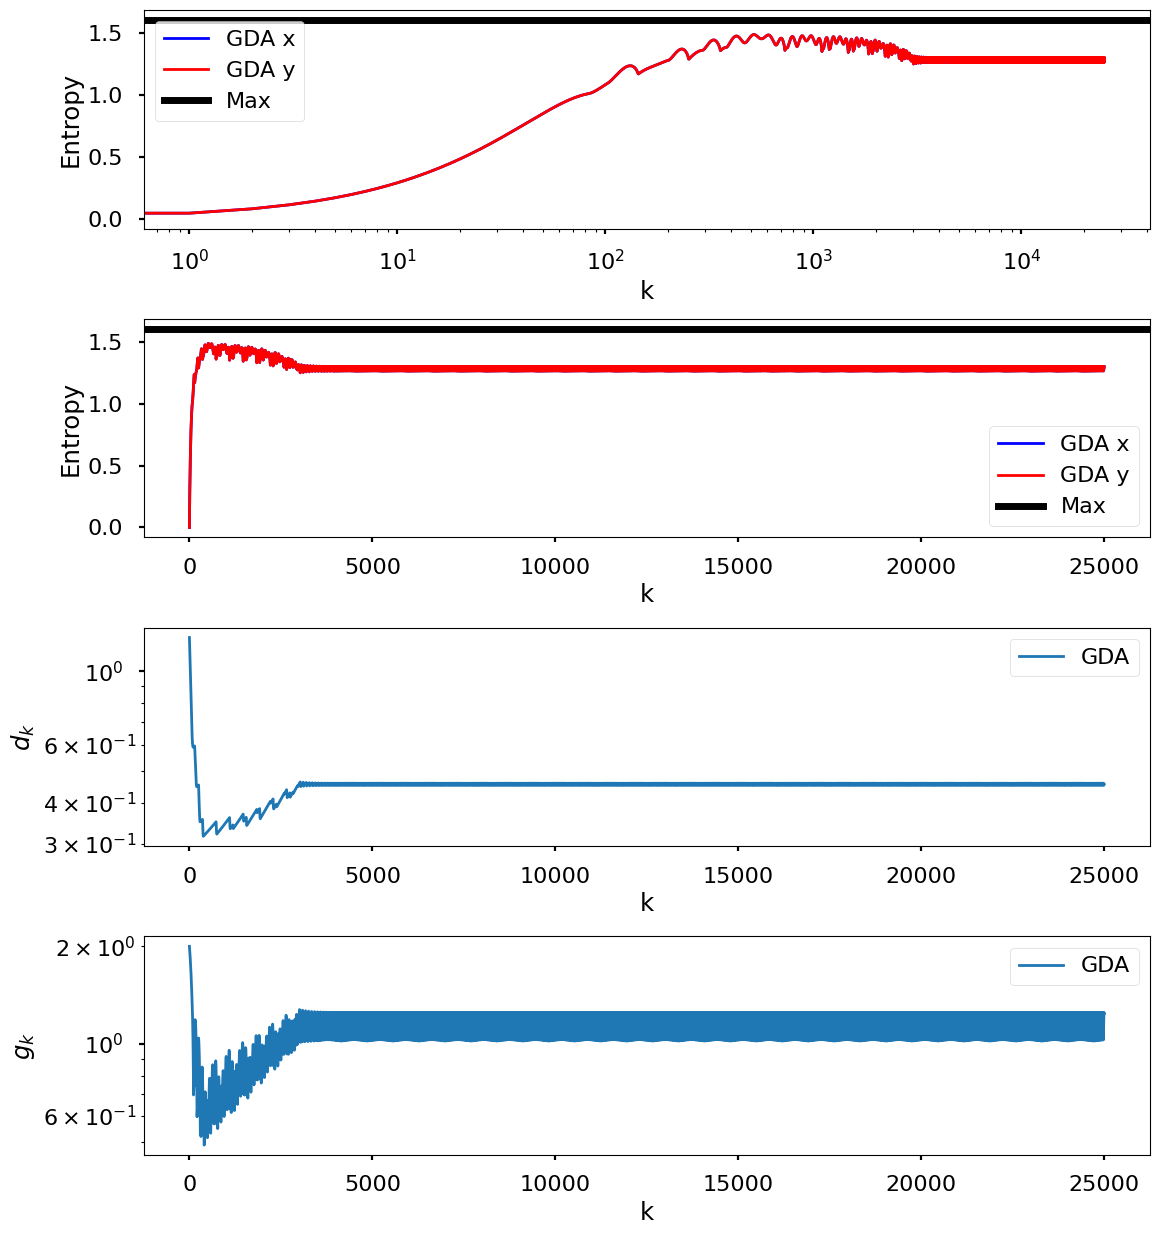

In [56]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(4, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=2, color='b', label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=2, color='r', label="GDA y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=2, color='b', label="GDA x")
ax[1].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=2, color='r', label="GDA y")
ax[1].axline((0, np.log(5)), slope=0, color='black', lw=5, label="Max")
ax[1].legend()
ax[1].set_xscale("linear")
ax[1].set_xlabel("k")
ax[1].set_ylabel("Entropy")
ax[2].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=2, label="GDA")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$d_k$")
ax[3].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=2, label="GDA")
ax[3].legend()
ax[3].set_yscale("log")
ax[3].set_xlabel("k")
ax[3].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(3)** (3 point) What kind of behavior do you observe ? Do the iterates converge ? Play with the step_size and the number of iterations.




From analyzing the graphes, the algorithm never converges. By testing multiple stepsizes and iteration numbers, for any stepsize, there is an iteration where the distance $d_k$ and the gap $g_k$ are minimized (but not equal to 0 !) before going back up and reaching a "plateau" where the values oscillate around a certain point. 
This is certainly because the algorithm cannot converge, as seen in part 1.1.(3)

**(4)** (4 points) As you've shown both theoretically and in practice, simultaneous Gradient Descent Ascent (sGDA) cannot solve the problem. You will now implement algorithm that can solve bilinear games. We will denote the projection onto the decision space of the x-player and y-player, $\Pi_{\mathcal X}$ and $\Pi_{\mathcal Y}$, respectively.


Let $\mathbf{z}_k = \begin{bmatrix} x_k \\ y_k \end{bmatrix}$, $\Pi(\mathbf{z})=\begin{bmatrix} \Pi_{\mathcal X}(x) \\ \Pi_{\mathcal Y}(y) \end{bmatrix}$ and $G(\mathbf{z}_k) = \begin{bmatrix} \nabla_x f(x_k,y_k) \\ -\nabla_y f(x_k,y_k) \end{bmatrix}$.

Consider the following implicit updates, which is the `Proximal Point Method ` (PPM) for solving the bilinear games:
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{red}{\mathbf{z}_{k+1}})) \nonumber
\end{equation}


Let’s first prove that the Proximal Point Method (PPM) converges in a simple case to build intuition. Consider the aforementioned stylized function $f: \mathbb{R}^2 \to \mathbb{R}$, such that $f(x, y)=xy$, and consider simplified unconstrained probelm, i.e., the projection is the identity map. Prove that PPM converges.

[Hint] Rewrite the implicit update as an explicit update in the form of $z_{k+1} = A z_{k}$ for some matrix $A$.

[Hint] A square matrix $A$ satisfies $\lim_{k \to \infty} A^k = 0$ if its spectral radius $\rho(A) < 1$, where the spectral radius is defined by
$
\rho(A) := \max_i |\lambda_i|,
$
with $\{\lambda_i\}$ denoting the  eigenvalues of $A$.

## Proximal Point Method for $f(x,y)=xy$

We consider the unconstrained PPM update
$$
\mathbf{z}_{k+1} = \mathbf{z}_k - \gamma\, G(\mathbf{z}_{k+1}),
\qquad
\mathbf{z}_k = \begin{bmatrix} x_k \\ y_k \end{bmatrix},
$$
where
$$
G(x,y) =
\begin{bmatrix}
\nabla_x f(x,y) \\
-\nabla_y f(x,y)
\end{bmatrix}
=
\begin{bmatrix}
y \\
-x
\end{bmatrix}.
$$

---

### 1. Deriving the explicit update
PPM gives the system
$$
\begin{cases}
x_{k+1} = x_k - \gamma\, y_{k+1}, \\
y_{k+1} = y_k + \gamma\, x_{k+1}.
\end{cases}
$$

Solving it yields
$$
x_{k+1} = \frac{1}{1+\gamma^2} (x_k - \gamma y_k),
\qquad
y_{k+1} = \frac{1}{1+\gamma^2} (\gamma x_k + y_k).
$$

Thus the iteration is linear:
$$
\mathbf{z}_{k+1}
=
A\,\mathbf{z}_k,
\qquad
A = \frac{1}{1+\gamma^2}
\begin{bmatrix}
1 & -\gamma \\
\gamma & 1
\end{bmatrix}.
$$

---

### 2. Spectral radius of $A$

The eigenvalues of
$$
B = 
\begin{bmatrix}
1 & -\gamma \\
\gamma & 1
\end{bmatrix}
$$
are
$$
\lambda_B^\pm = 1 \pm i\gamma.
$$

Since $A = \frac{1}{1+\gamma^2} B$, the eigenvalues of $A$ are
$$
\lambda_A^\pm = \frac{1}{1+\gamma^2}(1 \pm i\gamma).
$$

Their magnitude is
$$
|\lambda_A^\pm|
=
\frac{\sqrt{1^2+\gamma^2}}{1+\gamma^2}
=
\frac{\sqrt{1+\gamma^2}}{1+\gamma^2}
=
\frac{1}{\sqrt{1+\gamma^2}}
< 1.
$$

Hence the spectral radius satisfies
$$
\rho(A) = \frac{1}{\sqrt{1+\gamma^2}} < 1.
$$

Since a matrix with $\rho(A) < 1$ satisfies $A^k \to 0$, we obtain
$$
\mathbf{z}_k = A^k \mathbf{z}_0 \to 0.
$$

---

### 3. Conclusion
PPM converges to the saddle point:
$$
(x_k, y_k) \to (0,0),
$$
so the **Proximal Point Method converges** for the bilinear game $f(x,y)=xy$.

**(5)** (6 points)  In general, computing the next iterate $\mathbf{z}_{k+1}$ in PPM requires you to solve a fixed point problem because we are evaluating the gradient at the unknown next iterate. As this is too costly, we circumvent this difficulty by doing an _extrapolation_ step. The idea behind `ExtraGradient` (EG) is to approximate an implicit update with a more tractable one. Define the half steps:

\begin{equation}
    \mathbf{z}_{k+1/2} = \Pi(\mathbf{z}_k - \gamma G(\mathbf{z}_k)) \nonumber
\end{equation}

These half step extrapolation variables will help us to approximate the implicit iterates. We can then write
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k+1/2}})) \nonumber
\end{equation}
The recursion above defines the ExtraGradient algorithm.

In [9]:
def ExtraGradient(f, x, y, step_size):
    payoff = f(x, y)
    payoff.backward()
    
    if x.grad is None or y.grad is None:
        x.grad = torch.zeros_like(x.data)
        y.grad = torch.zeros_like(y.data)

    x_half_step = torch.zeros_like(x, requires_grad = True) 
    y_half_step = torch.zeros_like(y, requires_grad = True)
    
    with torch.no_grad():
        x_half_step.data = x.data - step_size*x.grad
        y_half_step.data = y.data + step_size*y.grad
    
        simplex_project(x_half_step)
        simplex_project(y_half_step)

        x.grad.zero_()
        y.grad.zero_()

        x_half_step.retain_grad()
        y_half_step.retain_grad()
        
    payoff = f(x_half_step, y_half_step)
    payoff.backward()
    
    with torch.no_grad():
        x.data = x.data - step_size*x_half_step.grad
        y.data = y.data + step_size*y_half_step.grad
     
        simplex_project(x)
        simplex_project(y)

        x_half_step.grad.zero_()
        y_half_step.grad.zero_()

In [10]:
eg_x_sequence, eg_y_sequence = run_alg(ExtraGradient, f, x_init, y_init, step_size=0.1, n_iterations=2500)

In [11]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(eg_x_sequence[:, dim_pairs[dim_pair]], 
                  eg_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

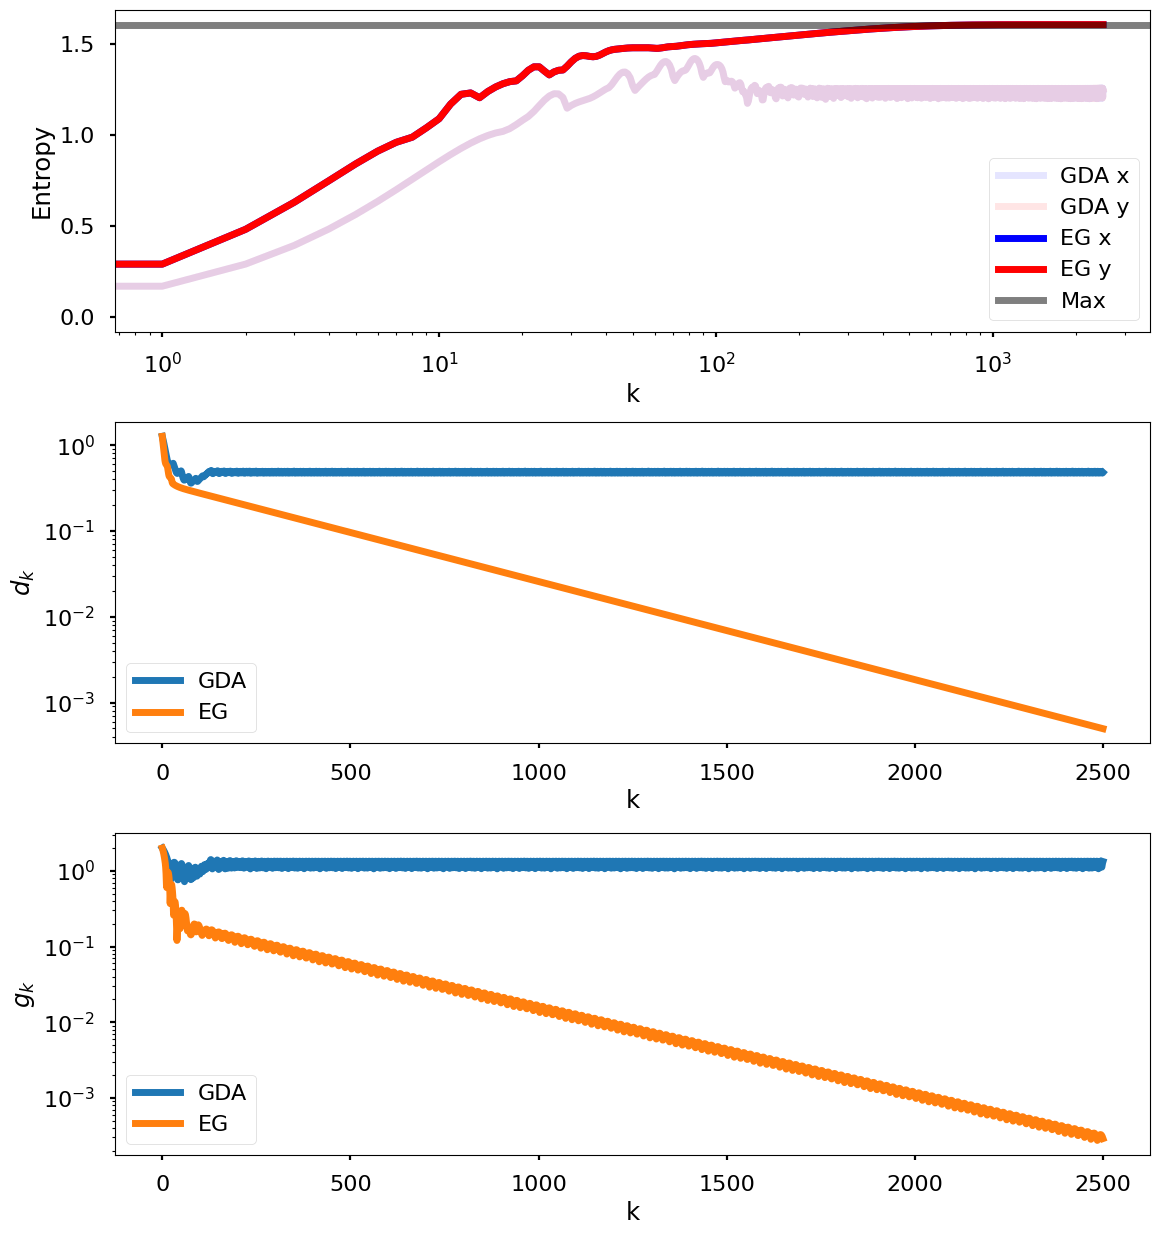

In [12]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', alpha=0.1, label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', alpha=0.1, label="GDA y")
ax[0].plot(range(len(eg_x_sequence)), entropy(eg_x_sequence, axis=1), lw=5, color='b', label="EG x")
ax[0].plot(range(len(eg_y_sequence)), entropy(eg_y_sequence, axis=1), lw=5, color='r', label="EG y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].plot(range(len(eg_x_sequence)), distance_to_opt(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(eg_x_sequence)), duality_gap(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(BONUS)** What can you observe about the optimal solution? What properties does the optimal Rock-Paper-Scissors-Lizard-Spock strategy have? Prove that extra-gradient in the bilinear case doesn't diverge like GDA. (Again, candy reward for correct answers!)




**(6)** (10 points) It turns out that we can _generalize_ the ExtraGradient method naturally by striving for a bit more accurate extrapolation. Namely, instead of always performing 1 extrapolation step updating half-iterates before the main parameter update, we can perform $m\geq 1$ fractional steps. Implement this ClairvoyantExtraGradient (CEG) method [1], with the precise update step formulas given below:

\begin{equation}
    \mathbf{z}_{k+1(\color{green}{1/m+1})} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k}})) \\
    \mathbf{z}_{k+1(\color{green}{2/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{1/m+1})})) \\
    \vdots \\
    \mathbf{z}_{k+1(\color{green}{m/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{m-1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{m-1/m+1})})) \\
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G({\mathbf{z}_{k+1(\color{green}{m/m+1})} })) \nonumber
\end{equation}


[1] Cevher, Volkan, Georgios Piliouras, Ryann Sim, and Stratis Skoulakis. “Min-Max Optimization Made Simple: Approximating the Proximal Point Method via Contraction Maps.” In 2023 Symposium on Simplicity in Algorithms (SOSA), 192–206. Proceedings. Society for Industrial and Applied Mathematics, 2023. https://doi.org/10.1137/1.9781611977585.ch18.

In [13]:
def ClairvoyantExtraGradient(f, x, y, step_size, m=1):
    payoff = f(x, y)
    payoff.backward()
    
    if x.grad is None or y.grad is None:
        x.grad = torch.zeros_like(x.data)
        y.grad = torch.zeros_like(y.data)

    # First fractional step: z_{k+1(1/(m+1))} starting from (x, y)
    z_mid_x = torch.zeros_like(x, requires_grad=True)
    z_mid_y = torch.zeros_like(y, requires_grad=True)

    with torch.no_grad():
        z_mid_x.data = x.data - step_size * x.grad     # descent in x
        z_mid_y.data = y.data + step_size * y.grad     # ascent in y

        simplex_project(z_mid_x)
        simplex_project(z_mid_y)

        x.grad.zero_()
        y.grad.zero_()

        z_mid_x.retain_grad()
        z_mid_y.retain_grad()

    # Additional (m-1) fractional steps:
    # z_{k+1((j+1)/(m+1))} = Π(z_{k+1(j/(m+1))} - γ G(z_{k+1(j/(m+1))}))
    for _ in range(m - 1):
        payoff = f(z_mid_x, z_mid_y)
        payoff.backward()

        with torch.no_grad():
            z_mid_x.data = z_mid_x.data - step_size * z_mid_x.grad
            z_mid_y.data = z_mid_y.data + step_size * z_mid_y.grad

            simplex_project(z_mid_x)
            simplex_project(z_mid_y)

            z_mid_x.grad.zero_()
            z_mid_y.grad.zero_()

            z_mid_x.retain_grad()
            z_mid_y.retain_grad()

    # Final step:
    # z_{k+1} = Π(z_k - γ G(z_{k+1(m/(m+1))}))
    payoff = f(z_mid_x, z_mid_y)
    payoff.backward()

    with torch.no_grad():
        x.data = x.data - step_size * z_mid_x.grad
        y.data = y.data + step_size * z_mid_y.grad

        simplex_project(x)
        simplex_project(y)

        z_mid_x.grad.zero_()
        z_mid_y.grad.zero_()

    return x, y, payoff
    

In [14]:
m_values = [1, 2, 3, 5, 10, 25] # You can change this if you wish
ceg_x_sequences, ceg_y_sequences = [], []
for m in m_values:
    print("m =", m)
    step_size = 0.1 if m != 10 else 0.09 # You can change this if you wish
    ceg_x_sequence, ceg_y_sequence = run_alg(ClairvoyantExtraGradient, f, x_init, y_init, 
                                             n_iterations=2500, step_size=step_size, m=m)
    ceg_x_sequences.append(ceg_x_sequence)
    ceg_y_sequences.append(ceg_y_sequence)

m = 1
m = 2
m = 3
m = 5
m = 10
m = 25


In [15]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(L_x, L_y, dim_pair):
    visualize_seq(L_x[:, dim_pairs[dim_pair]], 
                  L_y[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    print("m =", m)
    interact(visualize_seq_slice, L_x=fixed(ceg_x_sequence), L_y=fixed(ceg_y_sequence), dim_pair=SelectionSlider(
        options=range(len(dim_pairs)),
        value=0,
        description="Dim pair:",
        disabled=False,
        continuous_update=False,
        orientation="horizontal",
        readout=True
    ))

m = 1


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 2


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 3


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 5


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 10


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 25


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

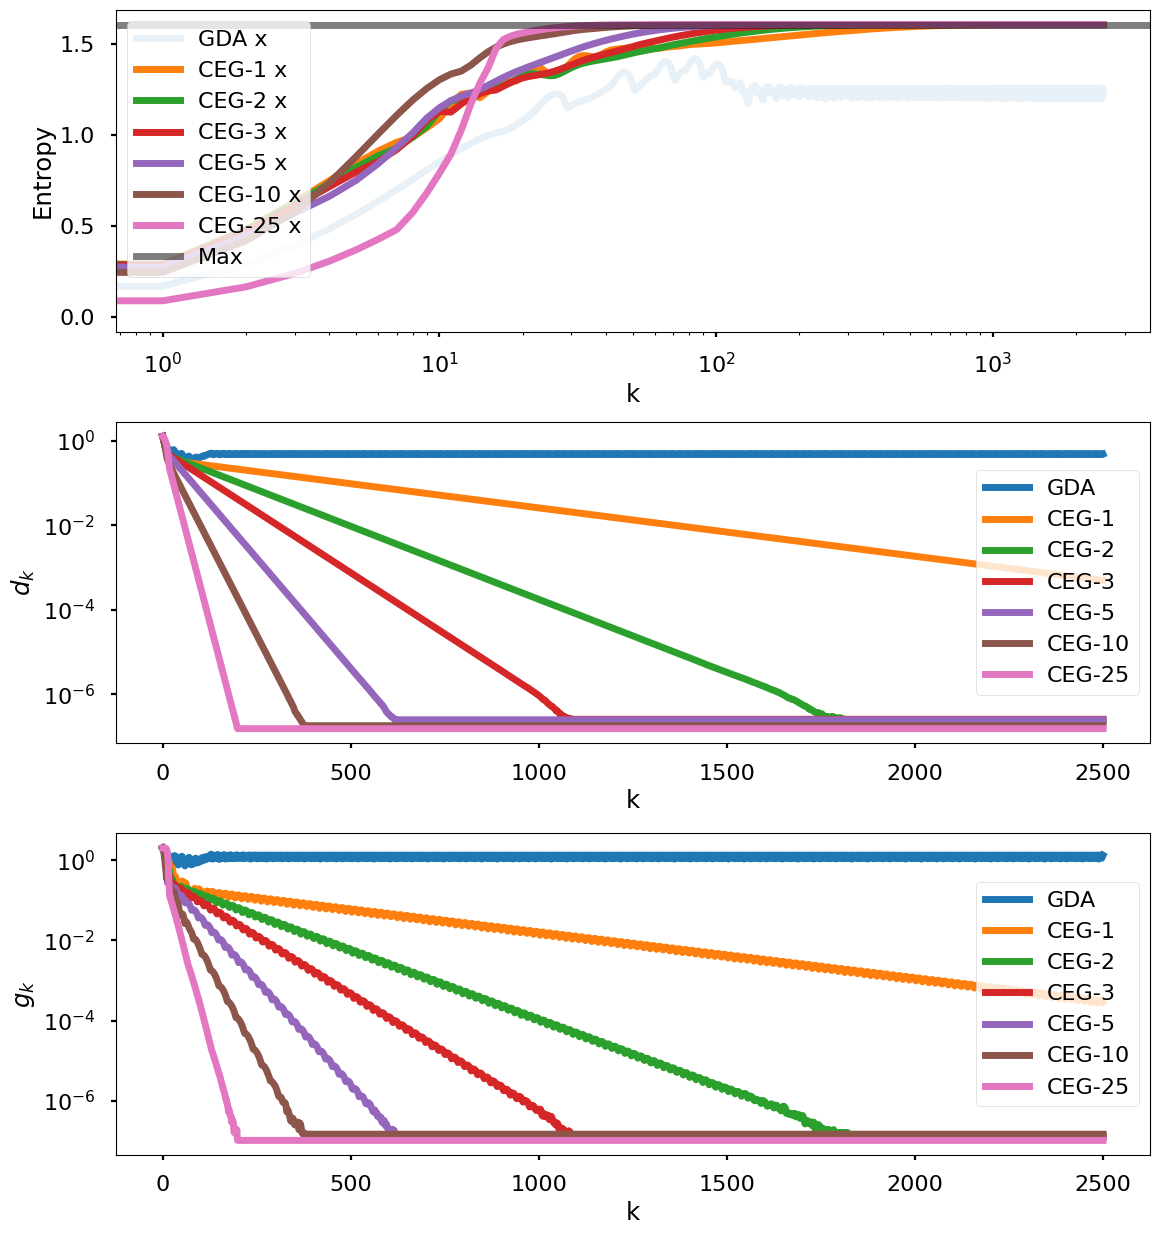

In [16]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, alpha=0.1, label="GDA x")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    ax[0].plot(range(len(ceg_x_sequence)), entropy(ceg_x_sequence, axis=1), lw=5, label=f"CEG-{m} x")
    ax[1].plot(range(len(ceg_x_sequence)), distance_to_opt(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
    ax[2].plot(range(len(ceg_x_sequence)), duality_gap(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()
fig.tight_layout()
plt.show()

**(7)** (5 points) Discuss what you observe for the CEG runs. How do the value of $m$ and the step size influence the convergence and the computation cost? Is there a sweet spot?




The CEG experiments seems to show a pattern: when we increase 
m, the method converges faster. 
With more fractional steps, the update becomes a better approximation of the proximal point method, which makes the iterates contract much more quickly. However, this comes at a cost—each extra step requires another gradient evaluation, so the per-iteration computation time grows linearly with m

What we see in the plots is that very large values ofm (like 10 or 25) do converge the fastest in terms of iteration count, but the improvement over moderate values is relatively small compared to the extra computational effort required. In contrast, values like 
m=3 or
m=5 already give a big jump in convergence speed while keeping the computational cost reasonable